In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('stud.csv')


In [12]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [13]:
X = df.drop(columns=['math_score'],axis=1)

In [15]:
y = df['math_score']

In [37]:
num_features= X.select_dtypes(exclude='object').columns
cat_features =X.select_dtypes(include='object').columns

In [38]:
num_transfrom = StandardScaler()
one_hotTrans = OneHotEncoder()

processor = ColumnTransformer(
    
    
    [("OneHotEncoder",OneHotEncoder(),cat_features),
     ("StandardScaler",StandardScaler(),num_features)
     ]
)

In [39]:
X = processor.fit_transform(X)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [55]:
x_train.shape,y_train.shape

((900, 19), (900,))

In [42]:
def eval_model(true,predicted):
    mae= mean_absolute_error(true,predicted)
    mse=mean_absolute_error(true,predicted)
    r2_square = r2_score(true,predicted)
    return mae,mse,r2_square


In [62]:
models = {
    "LinearRegression" : LinearRegression(),
    "lasso" : Lasso(),
    "Ridge" : Ridge(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" :RandomForestRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "KNeighborsRegressor" :KNeighborsRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    train_mae,train_mse,train_r2_square = eval_model(y_train,y_train_predict)
    test_mae,test_mse,test_r2_square = eval_model(y_test,y_test_predict)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_mse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2_square))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_mse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2_square))
    r2_list.append(test_r2_square)
    
    print('='*35)
    print('\n')

    

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 4.2362
- Mean Absolute Error: 4.2362
- R2 Score: 0.8785
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3700
- Mean Absolute Error: 4.3700
- R2 Score: 0.8535


lasso
Model performance for Training set
- Root Mean Squared Error: 5.1754
- Mean Absolute Error: 5.1754
- R2 Score: 0.8149
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.1676
- Mean Absolute Error: 5.1676
- R2 Score: 0.7925


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.2345
- Mean Absolute Error: 4.2345
- R2 Score: 0.8785
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3662
- Mean Absolute Error: 4.3662
- R2 Score: 0.8538


DecisionTreeRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0233
- Mean Absolute Error: 0.0233
- R2 Score: 0.9995
------------------------

In [68]:
df2 = pd.DataFrame(list(zip(model_list,r2_list)),columns=['modelName','R2_Squared']) 
df2.sort_values('R2_Squared',ascending=False)

,modelName,R2_Squared
2,Ridge,0.853801
0,LinearRegression,0.853475
5,CatBoostRegressor,0.849553
4,RandomForestRegressor,0.833521
6,XGBRegressor,0.801249
1,lasso,0.792481
7,KNeighborsRegressor,0.763823
3,DecisionTreeRegressor,0.708266


In [70]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
print("model performence is %.2f"%r2_score(y_test,y_pred)*100)

model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85model performence is 0.85

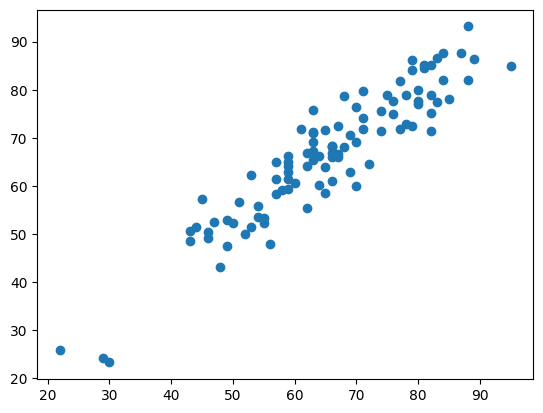

In [71]:
plt.scatter(y_test,y_pred)


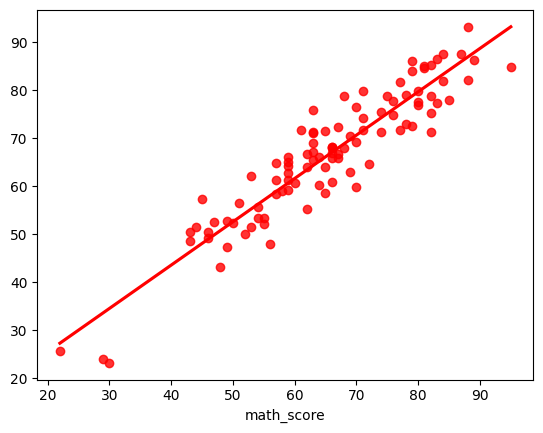

In [72]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');